## Performance X human likeness.

----

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set("notebook", font_scale=1.1, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 14

METRICS_HUMAN_LIKE = ['act_acc', 'accel_val_mae', 'steer_val_mae', 'speed_mae', 'pos_rmse']
METRICS_PERFORMANCE = ['goal_rate', 'off_road', 'veh_veh_collision']

### Helper functions

In [2]:
def make_figure(df_agg, hl_metric, fig_name, x_label, palette='colorblind'):
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))

    # Goal rate
    sns.scatterplot(
        data=df_agg,
        x=hl_metric,
        y='goal_rate',
        style='Reg. weight',
        hue='Reg. weight',
        legend=False,
        palette=palette,
        ax=axes[0]
    )

    sns.scatterplot(
        data=df_agg,
        x=hl_metric,
        y='off_road',
        style='Reg. weight',
        hue='Reg. weight',
        legend=False,
        palette=palette,
        ax=axes[1],
    )
    
    sns.scatterplot(
        data=df_agg,
        x=hl_metric,
        y='veh_veh_collision',
        style='Reg. weight',
        hue='Reg. weight',
        legend=True,
        palette=palette,
        ax=axes[2]
    )

    axes[0].grid(True, alpha=.5)
    axes[1].grid(True, alpha=.5)
    axes[2].grid(True, alpha=.5)
    axes[2].legend(
        bbox_to_anchor=(1.05, 1.0), 
        loc="upper left", 
        fontsize=11, 
        labelspacing=0.5
    )

    axes[0].set_ylabel("Goal rate [%]")
    axes[1].set_ylabel("Off-road [%]")
    axes[2].set_ylabel("Collision rate [%]")

    axes[0].set_xlabel(f"{x_label}")
    axes[1].set_xlabel(f"{x_label}")
    axes[2].set_xlabel(f"{x_label}")
    plt.tight_layout()
    
    plt.savefig(f"../evaluation/figures/{fig_name}.pdf", bbox_inches='tight')

### Load trade-off results df

In [3]:
df_res = pd.read_csv("../evaluation/results/df_trade_off.csv")

df_res

,Reg. weight,traffic_scene,agent_id,act_acc,accel_val_mae,steer_val_mae,pos_rmse,speed_mae,goal_rate,off_road,veh_veh_collision,Agent,Train agent,Dataset,Eval mode
0,0.0,tfrecord-00000-of-01000_469.json,0,0.000000,4.602151,0.088387,7.708942,7.629978,1.0,0.0,0.0,PPO,Self-play,data_new/train_no_tl,Self-play
1,0.0,tfrecord-00000-of-01000_469.json,1,0.000000,3.833333,0.071250,6.987065,6.255554,1.0,0.0,0.0,PPO,Self-play,data_new/train_no_tl,Self-play
2,0.0,tfrecord-00000-of-01000_469.json,2,0.000000,3.901961,0.062353,7.437159,6.400439,0.0,0.0,1.0,PPO,Self-play,data_new/train_no_tl,Self-play
3,0.0,tfrecord-00000-of-01000_469.json,3,0.000000,3.961905,0.054857,7.581043,6.360733,1.0,0.0,0.0,PPO,Self-play,data_new/train_no_tl,Self-play
4,0.0,tfrecord-00000-of-01000_469.json,4,0.000000,3.621212,0.082273,10.062430,7.970358,1.0,0.0,0.0,PPO,Self-play,data_new/train_no_tl,Self-play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,NaN,tfrecord-00068-of-01000_354.json,51,0.033333,2.019900,0.023881,102.063896,424.147191,0.0,0.0,0.0,BC,-,data_new/train_no_tl,Self-play
4610,NaN,tfrecord-00068-of-01000_354.json,53,0.000000,1.333333,0.040000,0.000000,0.000000,1.0,0.0,0.0,BC,-,data_new/train_no_tl,Self-play
4611,NaN,tfrecord-00068-of-01000_354.json,55,0.011111,1.777778,0.012222,1.859563,1.121262,0.0,0.0,1.0,BC,-,data_new/train_no_tl,Self-play
4612,NaN,tfrecord-00068-of-01000_354.json,89,0.000000,0.888889,0.016667,0.608364,0.459393,1.0,0.0,0.0,BC,-,data_new/train_no_tl,Self-play


In [4]:
mapping = {
    np.nan: "BC",
    0.0: "PPO",
    0.005: "HR-PPO | λ = 0.005",
    0.01: "HR-PPO | λ = 0.01",
    0.025: "HR-PPO | λ = 0.025",
    0.05: "HR-PPO | λ = 0.05",
    0.5: "HR-PPO | λ = 0.5",
    0.2: "HR-PPO | λ = 0.2",
    0.1: "HR-PPO | λ = 0.1",
}

df_res["Reg. weight"] = df_res["Reg. weight"].replace(mapping)

In [5]:
df_res.shape

(4614, 15)

In [6]:
# Create aggregate table
df_agg = df_res.groupby(['Reg. weight'])[METRICS_HUMAN_LIKE + METRICS_PERFORMANCE].mean() 
df_agg["goal_rate"] = df_agg["goal_rate"] * 100
df_agg["off_road"] = df_agg["off_road"] * 100
df_agg["veh_veh_collision"] = df_agg["veh_veh_collision"] * 100
df_agg["act_acc"] = df_agg["act_acc"] * 100

In [7]:
df_agg

,act_acc,accel_val_mae,steer_val_mae,speed_mae,pos_rmse,goal_rate,off_road,veh_veh_collision
Reg. weight,,,,,,,,
BC,7.943939,1.754975,0.015201,63.080547,11.223687,41.872562,13.133940,11.963589
HR-PPO | λ = 0.005,0.907383,3.756132,0.033374,55.161621,10.034411,96.098830,2.730819,1.170351
HR-PPO | λ = 0.01,1.181910,3.537051,0.029103,57.076186,10.190237,95.708713,2.990897,1.430429
HR-PPO | λ = 0.025,2.384049,2.815837,0.023318,54.824946,9.829897,93.368010,2.470741,3.771131
HR-PPO | λ = 0.05,4.957376,2.079919,0.017931,58.305924,10.045998,87.126138,3.641092,5.721717
PPO,0.238405,3.848730,0.078801,56.182613,9.806523,92.977893,3.771131,3.641092


### Is there a trade-off between human likeness and performance? | **Pareto frontier**

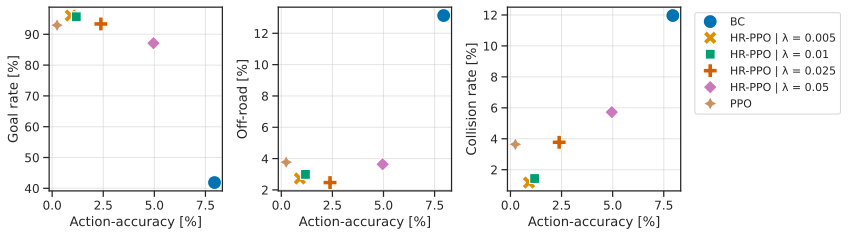

In [12]:
make_figure(df_agg=df_agg, hl_metric='act_acc', x_label='Action-accuracy [%]', fig_name='acc_x_performance')

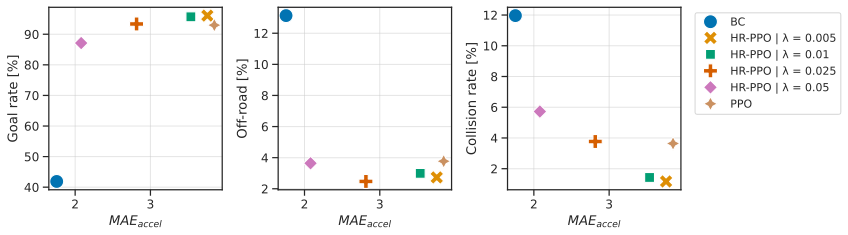

In [13]:
make_figure(df_agg=df_agg, hl_metric='accel_val_mae', x_label=r'$MAE_{accel}$', fig_name='acc_x_mae_accel')

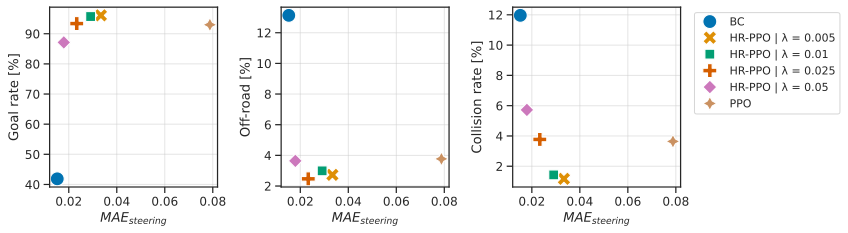

In [14]:
make_figure(df_agg=df_agg, hl_metric='steer_val_mae', x_label=r'$MAE_{steering}$', fig_name='acc_x_mae_steering')